In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df= pd.read_csv("titanic (1).csv")

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.drop("Cabin", axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
cate = []
for i in df.columns:
    if df[i].dtype == "object":
        cate.append(i)

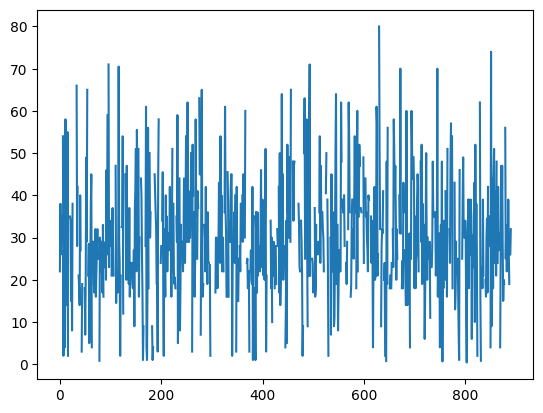

In [16]:
plt.plot(df['Age'])

In [20]:
df['Age'].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
for i in cate:
    df[i] = le.fit_transform(df[i])


In [26]:
df = df.drop(axis = 1, columns = ['PassengerId', 'Name'])

In [28]:
x = df.drop("Survived", axis = 1)
y = df["Survived"]

In [36]:
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.2)

In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()


In [40]:
clf.fit(x_train, y_train)

C:\Users\snk\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred = clf.predict(x_test)


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7794943820224719

In [46]:
confusion_matrix(y_test, y_pred)


array([[364,  77],
       [ 80, 191]], dtype=int64)